# 3.6.2 Simple Linear Regression 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Fitting simple linear regression with only one predictor(lstat)

In [4]:
lm_fit = smf.ols(formula='medv~lstat', data=df).fit()

In [5]:
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


Details about residuals of above fitted line

In [6]:
lm_fit.rsquared

0.54414629758647948

In [7]:
lm_fit.rsquared_adj

0.5432418259547066

In [8]:
lm_fit.resid.describe()

count    5.060000e+02
mean     1.393001e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

Finding confidence interval for different parameters

In [9]:
lm_fit.conf_int(alpha=0.95)

,0,1
Intercept,34.518543,34.589139
lstat,-0.952479,-0.947619


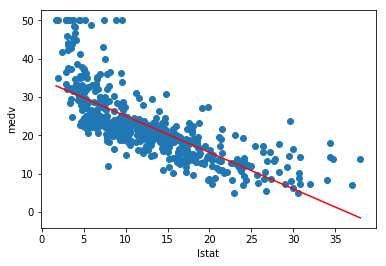

In [10]:
plt.scatter(df.lstat, df.medv )

X = pd.DataFrame({'lstat': [df.lstat.min(), df.lstat.max()]})
Y_pred = lm_fit.predict(X)
plt.plot(X, Y_pred, c='red')
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()

In [11]:
X_new = pd.DataFrame({'lstat': [5, 10, 15]})
lm_fit.predict(X_new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [12]:
import seaborn as sns

Plotting normalized residuals versus fitted values

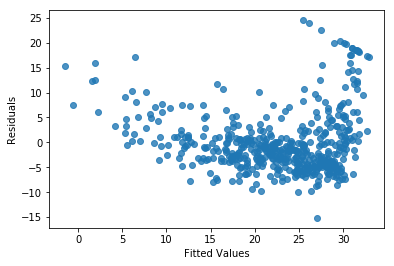

In [13]:
fitted_values = pd.Series(lm_fit.fittedvalues, name="Fitted Values")
residuals = pd.Series(lm_fit.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

# 3.6.3 Multiple Linear Regression

Fitting with two predictors(lstat & age)

In [14]:
lm_fit = smf.ols('medv~lstat+age', data=df).fit()
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,33.2228,0.731,45.458,0.000,31.787,34.659
lstat,-1.0321,0.048,-21.416,0.000,-1.127,-0.937
age,0.0345,0.012,2.826,0.005,0.011,0.059


Fitting with all 13 predictors 

In [15]:
columns_selected = "+".join(df.columns.difference(["medv"]))
my_formula = "medv~" + columns_selected
my_formula

'medv~age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [16]:
lm_fit = smf.ols(formula = my_formula, data=df).fit()
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,36.4595,5.103,7.144,0.000,26.432,46.487
age,0.0007,0.013,0.052,0.958,-0.025,0.027
black,0.0093,0.003,3.467,0.001,0.004,0.015
chas,2.6867,0.862,3.118,0.002,0.994,4.380
crim,-0.1080,0.033,-3.287,0.001,-0.173,-0.043
dis,-1.4756,0.199,-7.398,0.000,-1.867,-1.084
indus,0.0206,0.061,0.334,0.738,-0.100,0.141
lstat,-0.5248,0.051,-10.347,0.000,-0.624,-0.425
nox,-17.7666,3.820,-4.651,0.000,-25.272,-10.262
ptratio,-0.9527,0.131,-7.283,0.000,-1.210,-0.696


In [17]:
lm_fit.rsquared

0.74064266410940927

In [18]:
lm_fit.rsquared_adj

0.73378972637246276

In [19]:
lm_fit.resid.describe()

count    5.060000e+02
mean     9.061526e-14
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

Above we can see age predictor has very high p value so now fitting without age predictor.

In [20]:
columns_selected = "+".join(df.columns.difference(["medv", "age"]))
my_formula = "medv~" + columns_selected
my_formula

'medv~black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

In [21]:
lm_fit = smf.ols(formula = my_formula, data=df).fit()
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,36.4369,5.080,7.172,0.000,26.456,46.418
black,0.0093,0.003,3.481,0.001,0.004,0.015
chas,2.6890,0.860,3.128,0.002,1.000,4.378
crim,-0.1080,0.033,-3.290,0.001,-0.173,-0.043
dis,-1.4786,0.191,-7.757,0.000,-1.853,-1.104
indus,0.0206,0.061,0.335,0.738,-0.100,0.141
lstat,-0.5239,0.048,-10.999,0.000,-0.617,-0.430
nox,-17.7135,3.679,-4.814,0.000,-24.943,-10.484
ptratio,-0.9522,0.130,-7.308,0.000,-1.208,-0.696
rad,0.3058,0.066,4.627,0.000,0.176,0.436


After removing age cell and fitting again we see there is no difference in R-squared and adj.R-squared, hence it is correct to remove age

In [22]:
lm_fit.rsquared

0.74064121655051485

In [23]:
lm_fit.rsquared_adj

0.73432822384991892

In [24]:
lm_fit.resid.describe()

count    5.060000e+02
mean     4.528657e-14
std      4.683835e+00
min     -1.560538e+01
25%     -2.731276e+00
50%     -5.187814e-01
75%      1.760098e+00
max      2.622427e+01
dtype: float64

After removing age cell and fitting again we see there is no difference in R-squared and adj.R-squared, hence it is correct to remove age.

# 3.6.4 Interaction Terms

Inserting interaction term between 'lstat' and 'age'.

In [25]:
lm_fit = smf.ols('medv~lstat*age', data=df).fit()
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,36.0885,1.470,24.553,0.000,33.201,38.976
lstat,-1.3921,0.167,-8.313,0.000,-1.721,-1.063
age,-0.0007,0.020,-0.036,0.971,-0.040,0.038
lstat:age,0.0042,0.002,2.244,0.025,0.001,0.008


In [26]:
lm_fit.resid.describe()

count    5.060000e+02
mean    -5.605705e-14
std      6.130223e+00
min     -1.580652e+01
25%     -4.044681e+00
50%     -1.333163e+00
75%      2.084707e+00
max      2.755206e+01
dtype: float64

# 3.6.5 Non-linear Transformation of the Predictors

Now we are seeing the effect of addition of non linear transformation of the predictor(lstat)

In [27]:
lm_fit2 = smf.ols('medv~lstat+np.power(lstat, 2)', data=df).fit()
lm_fit2.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,42.8620,0.872,49.149,0.000,41.149,44.575
lstat,-2.3328,0.124,-18.843,0.000,-2.576,-2.090
"np.power(lstat, 2)",0.0435,0.004,11.628,0.000,0.036,0.051


Using the anova() function to know upto what extent the quadratic fit is superior to the linear fit.

In [28]:
import statsmodels.api as sm

In [29]:
lm_fit = smf.ols('medv~lstat', data=df).fit()
table = sm.stats.anova_lm(lm_fit, lm_fit2, typ=1)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# 3.6.6 Qualitative Predictors 

In [30]:
df = pd.read_csv("Carseats.csv", index_col=0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [32]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [33]:
columns_selected = "+".join(df.columns.difference(["Sales"]))
my_formula = "Sales~Income:Advertising+Price:Age+" + columns_selected  
my_formula

'Sales~Income:Advertising+Price:Age+Advertising+Age+CompPrice+Education+Income+Population+Price+ShelveLoc+US+Urban'

In [34]:
lm_fit = smf.ols(my_formula, data=df).fit()
lm_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.5756,1.009,6.519,0.000,4.592,8.559
ShelveLoc[T.Good],4.8487,0.153,31.724,0.000,4.548,5.149
ShelveLoc[T.Medium],1.9533,0.126,15.531,0.000,1.706,2.201
US[T.Yes],-0.1576,0.149,-1.058,0.291,-0.450,0.135
Urban[T.Yes],0.1402,0.112,1.247,0.213,-0.081,0.361
Income:Advertising,0.0008,0.000,2.698,0.007,0.000,0.001
Price:Age,0.0001,0.000,0.801,0.424,-0.000,0.000
Advertising,0.0702,0.023,3.107,0.002,0.026,0.115
Age,-0.0579,0.016,-3.633,0.000,-0.089,-0.027
CompPrice,0.0929,0.004,22.567,0.000,0.085,0.101


In [35]:
df_train = df.loc[:,'CompPrice':]

In [36]:
lm_fit.predict(df_train)[:10]


1      7.251552
2     12.221904
3      9.173095
4      8.442428
5      6.069167
6      9.757520
7      6.012340
8     11.633228
9      5.905712
10     5.638532
dtype: float64

In [37]:
(df.Sales - lm_fit.predict(df_train)).describe()

count    4.000000e+02
mean    -3.670038e-12
std      9.940033e-01
min     -2.920817e+00
25%     -7.502943e-01
50%      1.767764e-02
75%      6.754104e-01
max      3.341301e+00
dtype: float64